# Classification evaluation metrics
This notebook explores different evaluation metrics that can be used with classification models.  It uses the breast cancer dataset built into Sklearn.

## Imports

In [1]:
# Core libraries
import pandas as pd

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Sklearn classification model evaluation functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Matplotlib for charting
import matplotlib.pyplot as plt

## Load data

In [2]:
# Load built-in sample data set
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

## Inspect data

In [3]:
# View the input features
pd.DataFrame(data.data, columns=data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# View the output feature
pd.DataFrame(data.target, columns=["type"]).head()

,type
0,0
1,0
2,0
3,0
4,0


In [5]:
# Check what these output features represent
data.target_names

array(['malignant', 'benign'], dtype='<U9')

## Split into X and y

In [6]:
# Define the X (input) and y (target) features
X = data.data
y = data.target

## Scale features to same range

In [7]:
# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(data.data)

## Split into train and test sets

In [8]:
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Build a model

In [9]:
# Build and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the training data
predictions = model.predict(X_train) 

C:\Users\llewe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Explore evaluation metrics on training set

In [10]:
# Plot the confusion matrix
print(confusion_matrix(y_train, predictions))

[[144   9]
 [  2 226]]


In [11]:
# Accuracy score
accuracy_score(y_train, predictions)

0.9711286089238845

In [12]:
# Classification report
print(classification_report(y_train, predictions, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.99      0.94      0.96       153
      benign       0.96      0.99      0.98       228

   micro avg       0.97      0.97      0.97       381
   macro avg       0.97      0.97      0.97       381
weighted avg       0.97      0.97      0.97       381



## Plot the ROC and compute AUC

In [13]:
# Define a function to plot the ROC/AUC
def plotRocAuc(model, X, y):
    
    probabilities = model.predict_proba(X)
    probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y, probabilities)    
    
    # Plot the "dumb model" line
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # Plot the model line
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(roc_auc_score(y, probabilities),2)))
    
    # show the plot
    plt.show()

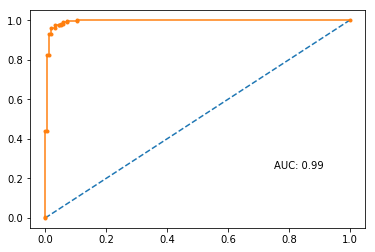

In [14]:
# ROC / AUC
plotRocAuc(model, X_train, y_train)

## Explore evaluation metrics on test set

LogisticRegression
----------------------------------
Confusion matrix:
[[ 52   7]
 [  0 129]]

Accuracy: 0.9627659574468085

Classification report:
              precision    recall  f1-score   support

   malignant       1.00      0.88      0.94        59
      benign       0.95      1.00      0.97       129

   micro avg       0.96      0.96      0.96       188
   macro avg       0.97      0.94      0.96       188
weighted avg       0.96      0.96      0.96       188


ROC / AUC:


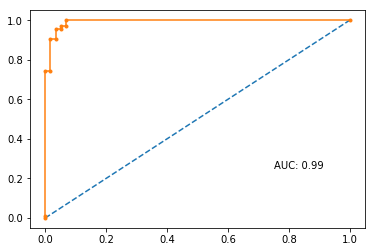

In [15]:
# Evaluate the model
predictions = model.predict(X_test)

print(type(model).__name__)    
print("----------------------------------")
print("Confusion matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))

print("\nClassification report:")
print(classification_report(y_test, predictions, target_names=data.target_names))

print("\nROC / AUC:")
plotRocAuc(model, X_test, y_test)